<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W6(Exercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

597.9189189189162


c:\Users\Acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


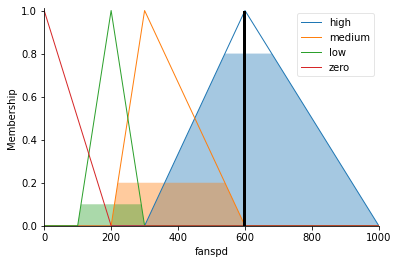

In [ ]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

#tempẻature controller
#level: okay, low, high
#valve: no change, open fast, close fast

temp = ctrl.Antecedent(np.arange(0,41,0.2), 'temp')
humidity = ctrl.Antecedent(np.arange(0,101,0.2), 'humidity')
fanspd = ctrl.Consequent(np.arange(0,1001,0.5), 'fanspd')
# 4 level
temp['cold'] = fuzz.trimf(temp.universe, [0,0,10])
temp['cool'] = fuzz.trimf(temp.universe, [0,10,20])
temp['warm'] = fuzz.trimf(temp.universe, [10,20,30])
temp['hot'] = fuzz.trimf(temp.universe, [20,30,40])
# 3 level
humidity['high'] = fuzz.trimf(humidity.universe, [50,75,100])
humidity['medium'] = fuzz.trimf(humidity.universe, [30,50,75])
humidity['low'] = fuzz.trimf(humidity.universe, [0,30,50])
# 4 level
fanspd['high'] = fuzz.trimf(fanspd.universe, [300,600,1000])
fanspd['medium'] = fuzz.trimf(fanspd.universe, [200,300,600])
fanspd['low'] = fuzz.trimf(fanspd.universe, [100,200,300])
fanspd['zero'] = fuzz.trimf(fanspd.universe, [0,0,200])
#create rules
rule0 = ctrl.Rule(temp['cold']&humidity['high'] ,fanspd['high'])

rule1 = ctrl.Rule(temp['cool']&humidity['high'] |
                  temp['cold']&humidity['medium'] |
                  temp['cold']&humidity['low'] ,fanspd['medium'])

rule2 = ctrl.Rule(temp['warm']&humidity['high'] |
                  temp['cool']&humidity['medium'] |
                  temp['cool']&humidity['low'] ,fanspd['low'])

rule3 = ctrl.Rule(temp['hot']&humidity['high'] |
                  temp['warm']&humidity['medium'] |
                  temp['hot']&humidity['medium'] |
                  temp['warm']&humidity['low'] |
                  temp['hot']&humidity['low'] ,fanspd['zero'])
#training
sim = ctrl.ControlSystem([rule0, rule1, rule2, rule3])
sim_ctrl = ctrl.ControlSystemSimulation(sim)

sim_ctrl.input['temp'] = 1
sim_ctrl.input['humidity'] = 70

sim_ctrl.compute()

print(sim_ctrl.output['fanspd'])

fanspd.view(sim=sim_ctrl)